/tmp/ipykernel_3150/2197210683.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rps"][i] = elem / average_vanila_rps


<AxesSubplot: xlabel='system', ylabel='rps'>

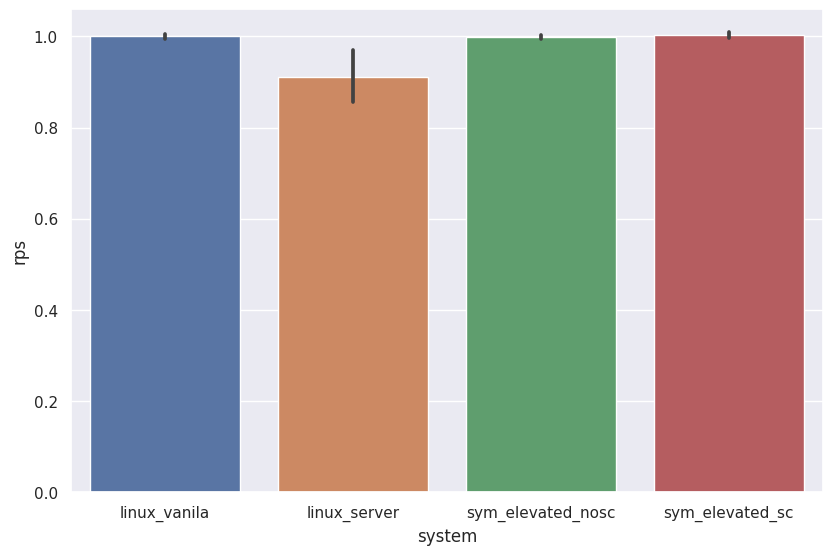

In [20]:
import pandas as pd
import seaborn as sb

sb.set_theme(style="darkgrid")
sb.set_palette("Set2")
sb.set(rc={'figure.figsize':(9.7,6.27)})

BASE_SYSTEM = 'linux_vanila'

def get_average_system_rps(df: pd.DataFrame, system: str):
    rps_elems = []
    idx = 0
    for entry in df["system"]:
        if entry == system:
            rps_elems.append(df["rps"][idx])

        idx += 1

    return sum(rps_elems) / len(rps_elems)

def preprocess_data(data: pd.DataFrame):
    average_vanila_rps = get_average_system_rps(data, BASE_SYSTEM)
    for i in range(len(data["rps"])):
        elem = data["rps"][i]
        data["rps"][i] = elem / average_vanila_rps

df = pd.read_csv("redis_expt_results.csv")
preprocess_data(df)

sb.barplot(data=df, x='system', y='rps')